In [1]:
!pip install audiomentations

In [2]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

In [3]:
#Loading the ground truth csv file
df = pd.read_csv('../input/esc50/ESC-50-master/meta/esc50.csv')

In [4]:
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [5]:
#Selecting the neccassary columns used for classification
df = df[['filename','target','category']]

In [6]:
df.head()

,filename,target,category
0,1-100032-A-0.wav,0,dog
1,1-100038-A-14.wav,14,chirping_birds
2,1-100210-A-36.wav,36,vacuum_cleaner
3,1-100210-B-36.wav,36,vacuum_cleaner
4,1-101296-A-19.wav,19,thunderstorm


In [7]:
#Display all the classes available in dataset
classes = np.unique(df['category'])
print(classes)

['airplane' 'breathing' 'brushing_teeth' 'can_opening' 'car_horn' 'cat'
 'chainsaw' 'chirping_birds' 'church_bells' 'clapping' 'clock_alarm'
 'clock_tick' 'coughing' 'cow' 'crackling_fire' 'crickets' 'crow'
 'crying_baby' 'dog' 'door_wood_creaks' 'door_wood_knock'
 'drinking_sipping' 'engine' 'fireworks' 'footsteps' 'frog'
 'glass_breaking' 'hand_saw' 'helicopter' 'hen' 'insects'
 'keyboard_typing' 'laughing' 'mouse_click' 'pig' 'pouring_water' 'rain'
 'rooster' 'sea_waves' 'sheep' 'siren' 'sneezing' 'snoring' 'thunderstorm'
 'toilet_flush' 'train' 'vacuum_cleaner' 'washing_machine' 'water_drops'
 'wind']


In [8]:
#Extracting the number of instances available in each class and storing it in a dictionary
count_dict = df['category'].value_counts()
print(count_dict)

thunderstorm        40
car_horn            40
keyboard_typing     40
snoring             40
siren               40
drinking_sipping    40
breathing           40
footsteps           40
cow                 40
frog                40
rain                40
crow                40
brushing_teeth      40
coughing            40
helicopter          40
pig                 40
sneezing            40
fireworks           40
crying_baby         40
crickets            40
door_wood_creaks    40
airplane            40
vacuum_cleaner      40
toilet_flush        40
door_wood_knock     40
can_opening         40
sea_waves           40
sheep               40
insects             40
pouring_water       40
rooster             40
washing_machine     40
clock_tick          40
clock_alarm         40
train               40
water_drops         40
chainsaw            40
hand_saw            40
church_bells        40
wind                40
crackling_fire      40
engine              40
dog                 40
cat        

In [9]:
#Grouping the data category-wise
df_grp = df.groupby(['category'])
PATH = '../input/esc50/ESC-50-master/audio'

In [10]:
#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

In [11]:
#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()

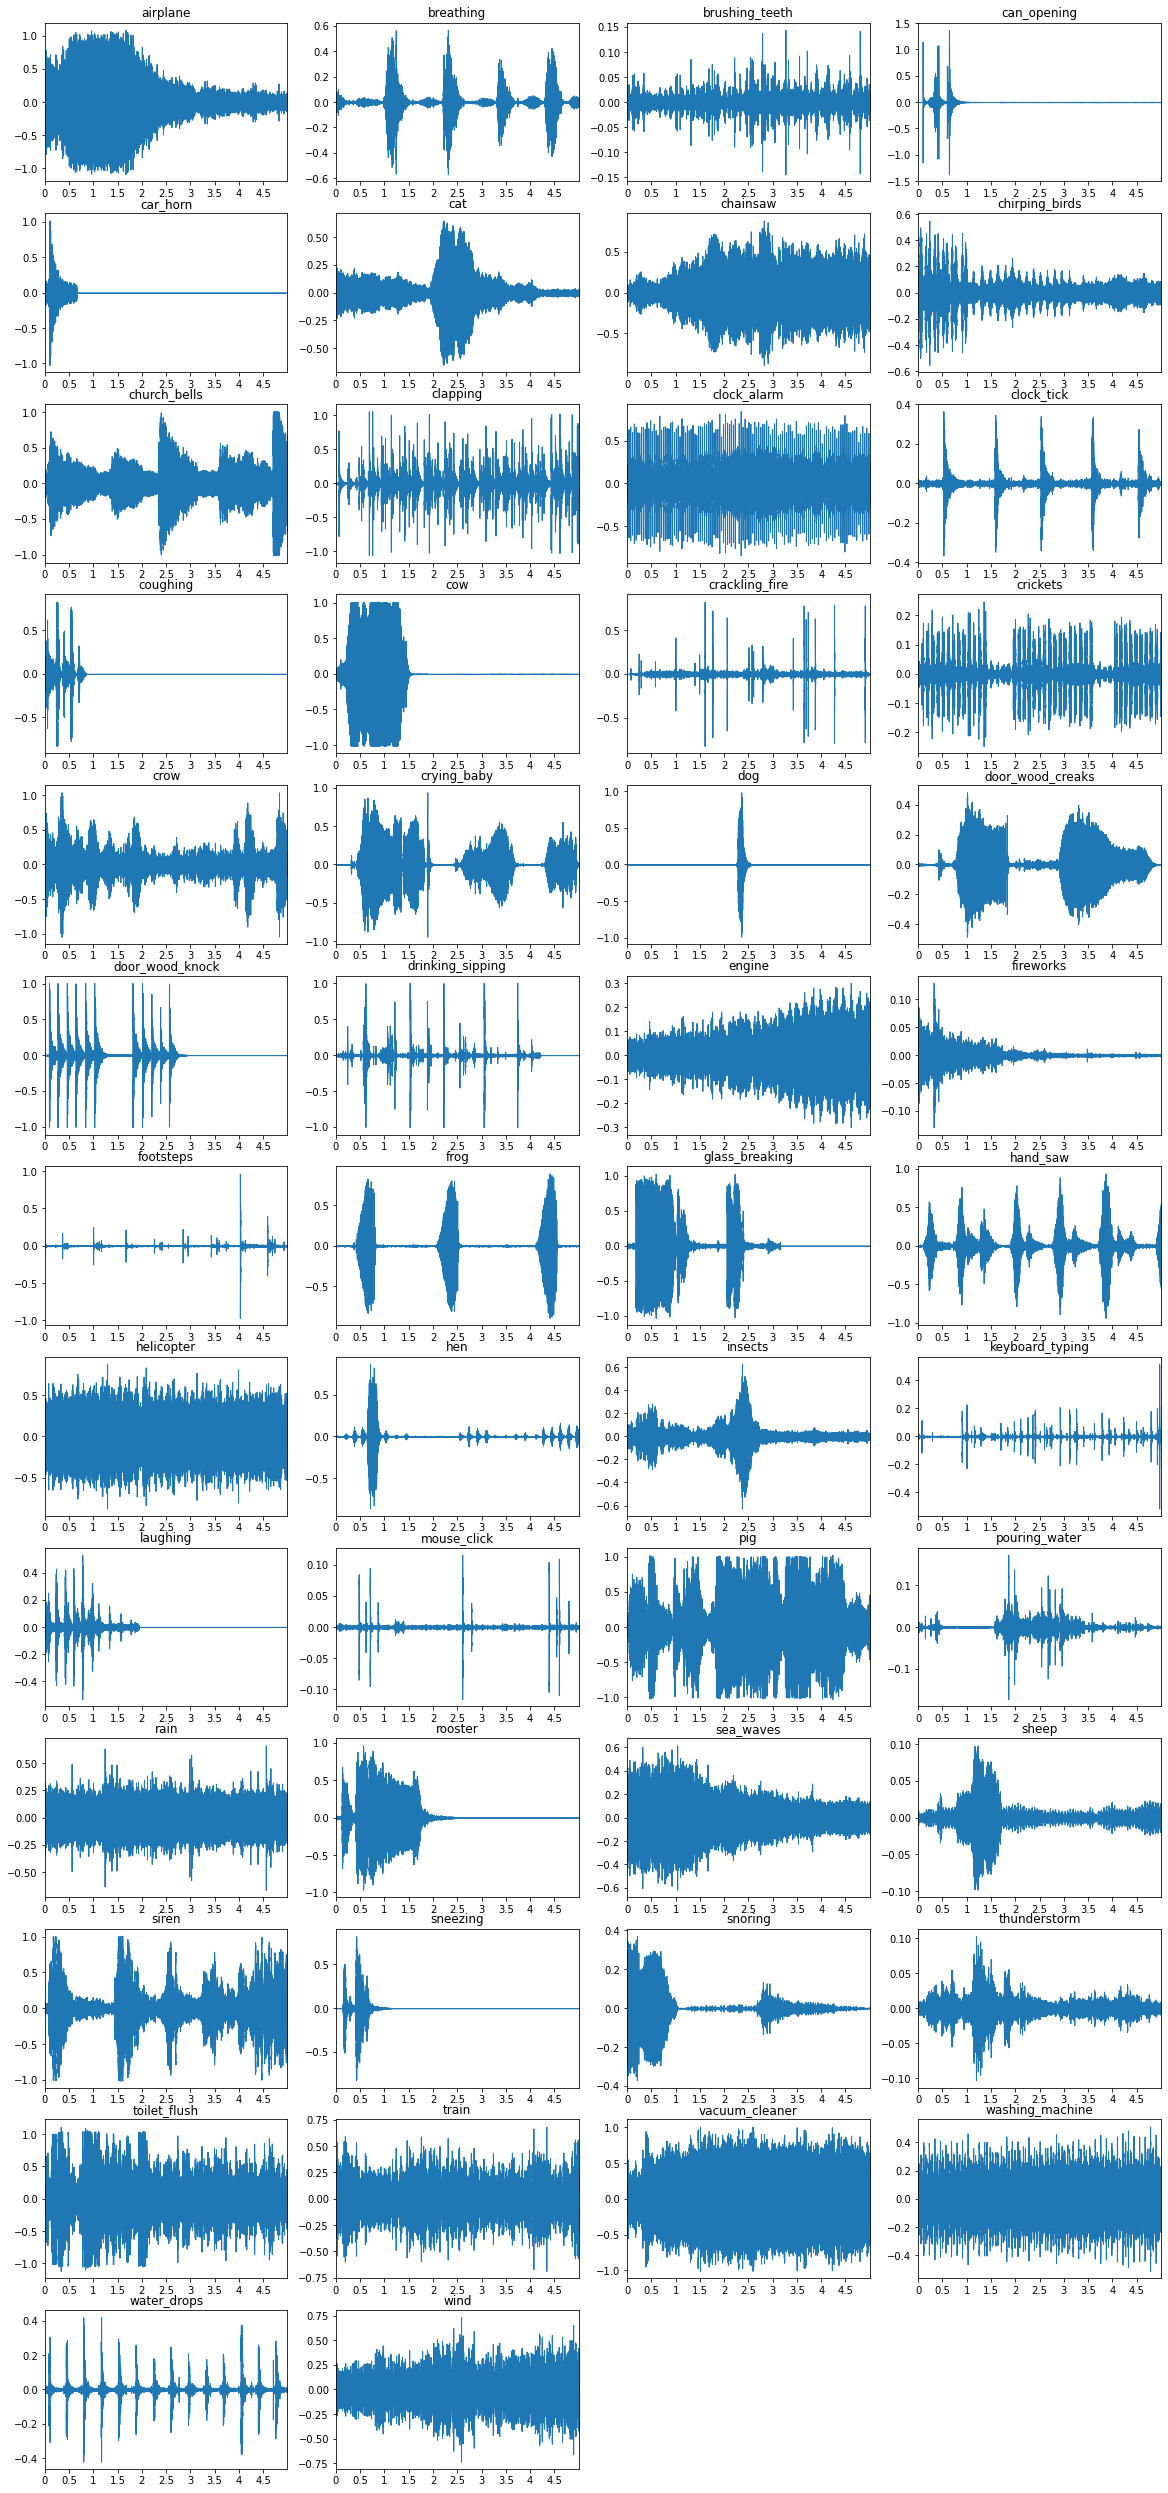

In [12]:
#Displaying time series plots for an instance in each category
PATH = '../input/esc50/ESC-50-master/audio/'
i = 1
fig = plt.figure(figsize=(20,45))
for key,group_df in df_grp:
    filename = group_df.iloc[0,0]
    category = group_df.iloc[0,2]
    plt.subplot(13,4,i)
    data,sample_rate = librosa.load(PATH+filename)
    librosa.display.waveplot(data,sr=sample_rate)
    plt.title(category)
    plt.xlabel('')
    i+=1
plt.show()

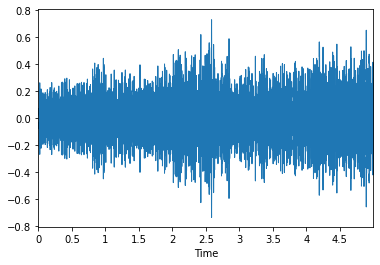

In [13]:
#Display a single plot
plotAudio(data,sample_rate)

In [14]:
#Listen to the audio
listenAudio(data,sample_rate)

In [15]:
#Converting the audio dataset into a numpy array
def saveAsNumpy():
    audio_files = []
    for file_name in tqdm(os.listdir(PATH)):
        try:
            data, sampling_rate = librosa.load(os.path.join(PATH,file_name))
            exp = re.findall('\d{1,2}.wav',file_name)
            audio_files.append([data,sampling_rate,int(float(exp[0][0:2]))])
        except Exception as e:
            pass
    return audio_files

In [16]:
audio_numpy = saveAsNumpy()
fname = 'original_audio_samples'
#np_save_path = '/gdrive/My Drive/CIP_ds/'
np.save(fname, audio_numpy)

100%|██████████| 2000/2000 [07:22<00:00,  4.52it/s]
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<a href="./original_audio_samples.npy"> Download File </a>

**AUGMENTATION**

In [17]:
get_ipython().magic('reset -sf')
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()

In [18]:
#Loading the saved numpy array
original_audio_data_numpy = np.load('original_audio_samples.npy',allow_pickle=True)

In [19]:
#Displaying the loaded numpy array
original_audio_data_numpy

array([[array([-1.8663798e-03,  4.7235019e-03, -9.0402894e-04, ...,
       -1.1382780e-05, -2.5607540e-05, -9.0788117e-06], dtype=float32),
        22050, 15],
       [array([-0.01978236, -0.02625145, -0.02057997, ..., -0.0076142 ,
       -0.00460335, -0.0003647 ], dtype=float32),
        22050, 19],
       [array([-0.03421642,  0.02844932,  0.04358507, ...,  0.27954045,
        0.07085399,  0.17038849], dtype=float32),
        22050, 36],
       ...,
       [array([ 6.0981706e-06, -2.7409707e-05,  1.3376730e-05, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
        22050, 15],
       [array([ 0.00914611,  0.00366581, -0.01160318, ...,  0.00420014,
        0.00392891,  0.00257251], dtype=float32),
        22050, 14],
       [array([ 0.00973544, -0.06944609, -0.1465539 , ...,  0.        ,
        0.        ,  0.        ], dtype=float32),
        22050, 22]], dtype=object)

In [20]:
df_org_np = pd.DataFrame(original_audio_data_numpy, columns = ['data','sampling_rate','category'])
df_org_np

,data,sampling_rate,category
0,"[-0.0018663798, 0.004723502, -0.00090402894, 0...",22050,15
1,"[-0.019782359, -0.026251452, -0.02057997, -0.0...",22050,19
2,"[-0.03421642, 0.02844932, 0.04358507, -0.29408...",22050,36
3,"[0.0013461491, 0.0019932226, 0.0017267463, 0.0...",22050,22
4,"[-0.13718751, -0.1813196, -0.11306347, -0.0987...",22050,40
...,...,...,...
1995,"[0.00080164516, 0.00087302254, 0.0004070742, 0...",22050,48
1996,"[-0.050393637, -0.07131728, -0.058072377, -0.0...",22050,47
1997,"[6.0981706e-06, -2.7409707e-05, 1.337673e-05, ...",22050,15
1998,"[0.009146113, 0.003665812, -0.011603184, -0.01...",22050,14


In [21]:
train_data, test_data = train_test_split(df_org_np,test_size=0.1,stratify=df_org_np['category'],random_state=42)

In [22]:
len(train_data.category.unique())

50

In [23]:
len(test_data.category.unique())

50

In [24]:
#Data Augmentation
augmentNoise = Compose([
    AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.015, p=1)
])
augmentShift = Compose([
    Shift(min_fraction=-0.2, max_fraction=0.2, p=1,rollover= False)
])
augmentNoiseShift = Compose([
    Shift(min_fraction=-0.2, max_fraction=0.2, p=1,rollover= False),
    AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.015, p=1)
])
#Function to add Noise to sound
def addNoise(data,sample_rate):
    augmented_data = augmentNoise(samples=data, sample_rate=sample_rate)
    return augmented_data

#Function to add Time Shift to sound
def addShift(data,sample_rate):
    augmented_data = augmentShift(samples=data, sample_rate=sample_rate)
    return augmented_data
  
#Function to add Noise and TimeShift to sound
def addNoiseShift(data,sample_rate):
    augmented_data = augmentNoiseShift(samples=data, sample_rate=sample_rate)
    return augmented_data

In [25]:
#Sample audio
augmented_data = addNoise(train_data.iloc[0][0],train_data.iloc[0][1])

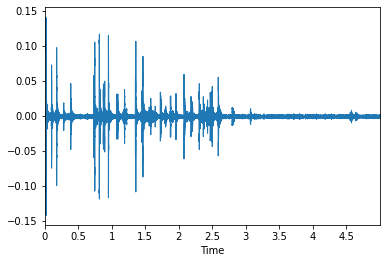

In [26]:
#Original
plotAudio(train_data.iloc[0][0],train_data.iloc[0][1])
plt.show()
listenAudio(train_data.iloc[0][0],train_data.iloc[0][1])

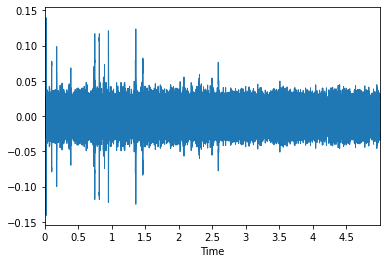

In [27]:
#Adding Noise
plotAudio(augmented_data,train_data.iloc[0][1])
plt.show()
listenAudio(augmented_data,train_data.iloc[0][1])

In [28]:
column_names = ["data", "sampling_rate", "category"]
df_augmented = pd.DataFrame(columns = column_names)
for index, row in df_org_np.iterrows():
    #Adding Noise
    augmented_data = addNoise(row['data'], row['sampling_rate'])
    if(np.all((np.subtract(augmented_data ,row['data'] != 0)))):
        df_augmented = df_augmented.append({'data':augmented_data, 'sampling_rate':row['sampling_rate'], 'category':row['category']},ignore_index=True)

    #Adding Time Shift
    # augmented_data = addShift(row['data'], row['sampling_rate'])
    # if(np.all((np.subtract(augmented_data ,row['data'] != 0)))):
    #     df_augmented = df_augmented.append({'data':augmented_data, 'sampling_rate':row['sampling_rate'], 'category':row['category']},ignore_index=True)

    # #Adding Noise and TimeShift
    # augmented_data = addNoiseShift(row['data'], row['sampling_rate'])
    # if(np.all((np.subtract(augmented_data ,row['data'] != 0)))):
    #     df_augmented = df_augmented.append({'data':augmented_data, 'sampling_rate':row['sampling_rate'], 'category':row['category']},ignore_index=True)

In [29]:
df_augmented

,data,sampling_rate,category
0,"[0.005914017, 0.00681706, 0.0016381333, -0.001...",22050,15
1,"[-0.038304836, -0.010767337, -0.042769954, -0....",22050,19
2,"[-0.020823535, 0.01724805, 0.040903367, -0.295...",22050,36
3,"[-0.037222356, 0.023756532, -0.016316064, -0.0...",22050,22
4,"[-0.14604554, -0.1793443, -0.11888786, -0.0971...",22050,40
...,...,...,...
1995,"[-0.0008660203, 0.00024438818, -0.00833849, 0....",22050,48
1996,"[-0.04653366, -0.0569321, -0.07417159, -0.0401...",22050,47
1997,"[-0.013765203, 0.0074317576, 0.021328673, 0.01...",22050,15
1998,"[-0.0010664351, -0.0176102, 0.0036282986, -0.0...",22050,14


In [30]:
print("Original Dataframe Size",train_data.shape)
train_data = train_data.append(df_augmented, ignore_index = True)
print("Dataframe with augmentation Size",train_data.shape)

Original Dataframe Size (1800, 3)
Dataframe with augmentation Size (3800, 3)


In [31]:
train_data

,data,sampling_rate,category
0,"[-0.00013695081, 6.4621425e-05, 0.000113711554...",22050,32
1,"[0.008537117, 0.021659402, 0.01707463, 0.00956...",22050,30
2,"[0.011399533, 0.050563376, 0.0496795, 0.016322...",22050,9
3,"[-0.041397214, -0.06102571, -0.053581703, -0.0...",22050,30
4,"[-0.021337466, -0.046921838, -0.047893617, -0....",22050,45
...,...,...,...
3795,"[-0.0008660203, 0.00024438818, -0.00833849, 0....",22050,48
3796,"[-0.04653366, -0.0569321, -0.07417159, -0.0401...",22050,47
3797,"[-0.013765203, 0.0074317576, 0.021328673, 0.01...",22050,15
3798,"[-0.0010664351, -0.0176102, 0.0036282986, -0.0...",22050,14


In [32]:
filename = 'train_augmented_all'
#np_save_path = '/gdrive/My Drive/CIP_ds/'
np.save(filename, train_data)

<a href="./train_augmented_all.npy"> Download File </a>

**Constructing Spectrogram from Fourier transformed audio sample**

In [33]:
get_ipython().magic('reset -sf')
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()

In [34]:
#Same data
train_data = np.load('train_augmented_all.npy',allow_pickle=True)
train_data = pd.DataFrame(train_data, columns = ['data','sampling_rate','category'])
train_data_audio = train_data['data']
train_data_category = train_data['category']

In [35]:
#train_data = pd.DataFrame(train_data, columns = ['data','sampling_rate','category'])
#train_data

In [36]:
#train_data_audio = train_data['data']
#train_data_category = train_data['category']

**Fourier Spectrogram**

In [37]:
train_fourier_spec = []
for audio in train_data_audio: 
    train_fourier_spec.append(librosa.amplitude_to_db(abs(librosa.stft(audio))))

In [38]:
train_fourier_spec = np.asarray(train_fourier_spec)

In [39]:
#Conv to numpy 
#train_fourier_spec = np.load('/gdrive/My Drive/CIP_ds/train_fourier_spec.npy',allow_pickle=True)
#Reshaping 
SPEC_H, SPEC_W = train_fourier_spec[0].shape
length = len(train_data_category)
train_fourier_spec = np.reshape(train_fourier_spec,(length,SPEC_H, SPEC_W,1))
print(train_fourier_spec.shape)

(3800, 1025, 216, 1)


In [40]:
train_fourier_spec_cat = []
for i in range(train_fourier_spec.shape[0]):
    train_fourier_spec_cat.append((train_fourier_spec[i],train_data_category[i]))

In [41]:
filename = 'train_fourier_spec_cat'
#np_save_path = '/gdrive/My Drive/CIP_ds/local'
np.save(filename, train_fourier_spec_cat)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


<a href="./train_fourier_spec_cat.npy"> Download File </a>

In [42]:
#train_fourier_spec_cat = np.load('train_fourier_spec_cat.npy',allow_pickle=True)

In [43]:
#train_fourier_spec = np.zeros((1025,216,1))
#for i in range(3800):
#    train_fourier_spec = np.append(train_fourier_spec,train_fourier_spec_cat[i][0],axis =0)

In [44]:
#print(train_fourier_spec.shape)

In [45]:
train_fourier_spec_cat[0][0][:,:,-1].shape

(1025, 216)

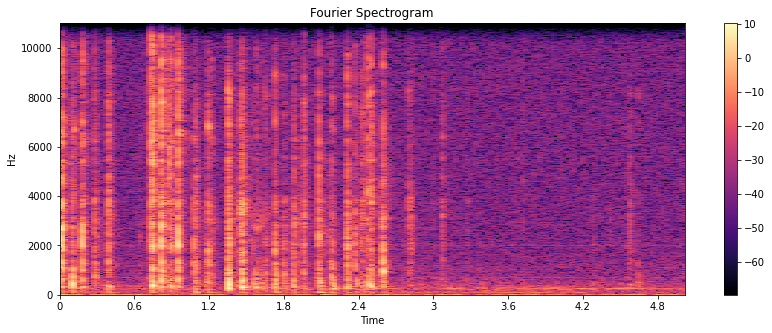

In [46]:
plt.figure(figsize=(14, 5))
plt.title('Fourier Spectrogram')
librosa.display.specshow(train_fourier_spec_cat[0][0][:,:,-1], sr=22050, x_axis='time', y_axis='hz') 
plt.colorbar()

**Mel Spectrogram**


In [47]:
get_ipython().magic('reset -sf')
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()

In [48]:
#Same data
train_data = np.load('train_augmented_all.npy',allow_pickle=True)
train_data = pd.DataFrame(train_data, columns = ['data','sampling_rate','category'])
train_data_audio = train_data['data']
train_data_category = train_data['category']

In [49]:
train_mel_spec = []
for audio in train_data_audio:
    train_mel_spec.append(librosa.amplitude_to_db(librosa.feature.melspectrogram(audio, 22050)))

In [50]:
SPEC_H, SPEC_W = train_mel_spec[0].shape
length = len(train_data_category)
train_mel_spec = np.reshape(train_mel_spec,(length,SPEC_H, SPEC_W,1))
print(train_mel_spec.shape)

(3800, 128, 216, 1)


In [51]:
train_mel_spec_cat = []
for i in range(train_mel_spec.shape[0]):
    train_mel_spec_cat.append((train_mel_spec[i],train_data_category[i]))

In [52]:
filename = 'train_mel_spec_cat'
#np_save_path = '/gdrive/My Drive/CIP_ds/local'
np.save(filename, train_mel_spec_cat)

<a href="./train_mel_spec_cat.npy"> Download File </a>

In [53]:
#train_mel_spec_cat = np.load('train_mel_spec_cat.npy',allow_pickle=True)

In [54]:
train_mel_spec_cat[0][0].shape

(128, 216, 1)

/opt/conda/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


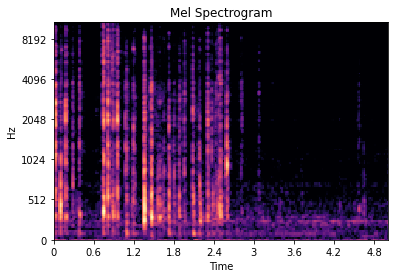

In [55]:
plt.title("Mel Spectrogram")
librosa.display.specshow(train_mel_spec_cat[0][0][:,:,-1], y_axis='mel', x_axis='time')

 **MFCC Spectrogram**

In [56]:
get_ipython().magic('reset -sf')
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()

In [57]:
#Same data
train_data = np.load('train_augmented_all.npy',allow_pickle=True)
train_data = pd.DataFrame(train_data, columns = ['data','sampling_rate','category'])
train_data_audio = train_data['data']
train_data_category = train_data['category']

In [58]:
train_mfcc_spec = []
for audio in train_data_audio:
    train_mfcc_spec.append(librosa.feature.mfcc(audio, 22050))

In [59]:
SPEC_H, SPEC_W = train_mfcc_spec[0].shape
length = len(train_data_category)
train_mfcc_spec = np.reshape(train_mfcc_spec,(length,SPEC_H, SPEC_W,1))
print(train_mfcc_spec.shape)

(3800, 20, 216, 1)


In [60]:
train_mfcc_spec_cat = []
for i in range(train_mfcc_spec.shape[0]):
    train_mfcc_spec_cat.append((train_mfcc_spec[i],train_data_category[i]))

In [61]:
filename = 'train_mfcc_spec_cat'
#np_save_path = '/gdrive/My Drive/CIP_ds/local'
np.save(filename, train_mfcc_spec_cat)

<a href="./train_mfcc_spec_cat.npy"> Download File </a>

In [62]:
train_mfcc_spec_cat[0][0].shape

(20, 216, 1)

In [63]:
#train_mfcc_spec_cat = np.load('train_mfcc_spec_cat.npy',allow_pickle= True)

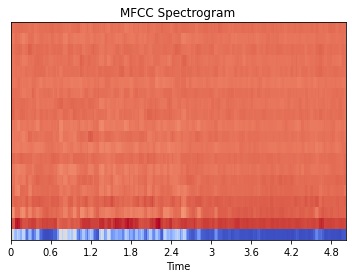

In [64]:
plt.title('MFCC Spectrogram')
librosa.display.specshow(train_mfcc_spec_cat[0][0][:,:,-1], sr=22050, x_axis='time')

**MinMax Scaling for Fourier Spectrogram**

In [65]:
get_ipython().magic('reset -sf')
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()

In [66]:
train_fourier_spec_cat = np.load('train_fourier_spec_cat.npy',allow_pickle = True)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [68]:
for i in range(train_fourier_spec_cat.shape[0]):
  train_fourier_spec_cat[i][0][:,:,0] = scaler.fit_transform(train_fourier_spec_cat[i][0][:,:,0])

In [69]:
filename = 'train_fourier_spec_normalised'
#np_save_path = '/gdrive/My Drive/CIP_ds/local/'
np.save(filename, train_fourier_spec_cat)

<a href="./train_fourier_spec_normalised.npy"> Download File </a>

**MinMax Scaling for Mel Spectrogram**

In [70]:
get_ipython().magic('reset -sf')
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()
    

In [71]:
train_mel_spec_cat = np.load('train_mel_spec_cat.npy',allow_pickle = True)

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in range(train_mel_spec_cat.shape[0]):
  train_mel_spec_cat[i][0][:,:,0] = scaler.fit_transform(train_mel_spec_cat[i][0][:,:,0])

In [73]:
filename = 'train_mel_spec_normalised'
#np_save_path = '/gdrive/My Drive/CIP_ds/local/'
np.save(filename, train_mel_spec_cat)

<a href="./train_mel_spec_normalised.npy"> Download File </a>

**MinMax Scaling for MFCC Coefficients**

In [74]:
get_ipython().magic('reset -sf')
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()

In [75]:
train_mfcc_spec_cat = np.load('train_mfcc_spec_cat.npy',allow_pickle = True)

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in range(train_mfcc_spec_cat.shape[0]):
  train_mfcc_spec_cat[i][0][:,:,0] = scaler.fit_transform(train_mfcc_spec_cat[i][0][:,:,0])

In [77]:
filename = 'train_mfcc_spec_normalised'
#np_save_path = '/gdrive/My Drive/CIP_ds/local/'
np.save(filename, train_mfcc_spec_cat)

<a href="./train_mfcc_spec_normalised.npy"> Download File </a>

**Plotting Normalized Spectrograms**

In [78]:
get_ipython().magic('reset -sf')
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()

In [79]:
#train_fourier_spec_normalised = np.load('/gdrive/My Drive/CIP_ds/local/train_fourier_spec_normalised.npy')
#train_mel_spec_normalised = np.load('/gdrive/My Drive/CIP_ds/local/train_mel_spec_normalised.npy')
#train_mfcc_spec_normalised = np.load('/gdrive/My Drive/CIP_ds/local/train_mfcc_spec_normalised.npy')

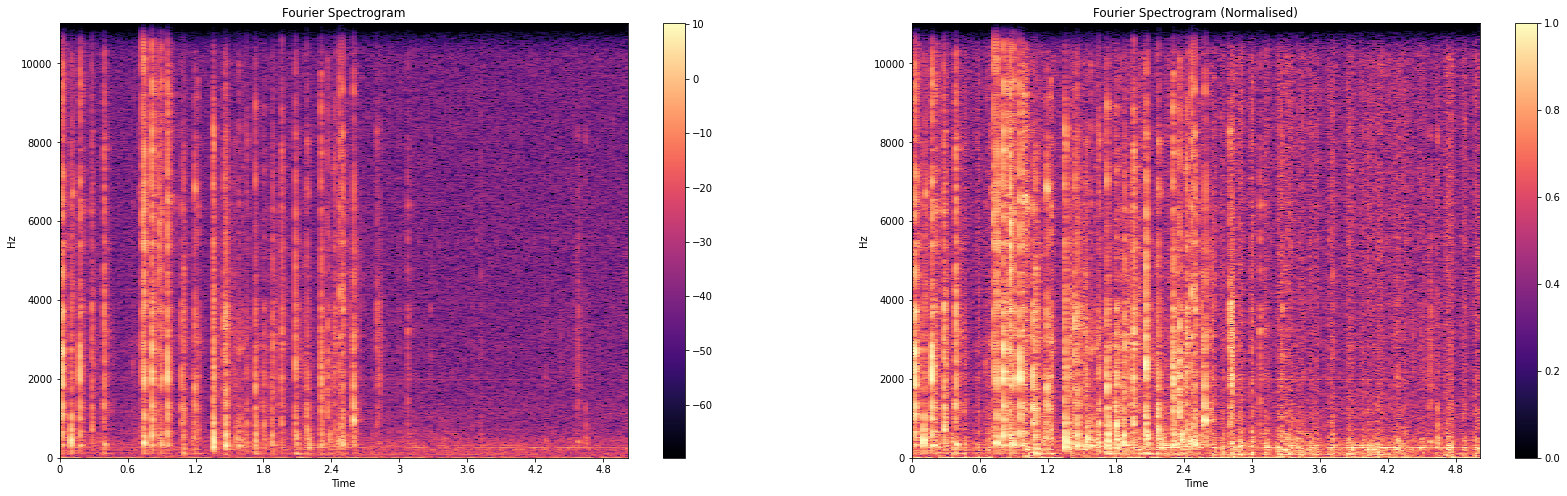

In [80]:
train_fourier_spec_normalised = np.load('train_fourier_spec_normalised.npy',allow_pickle = True)
train_fourier_spec_cat = np.load('train_fourier_spec_cat.npy',allow_pickle = True)

plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
plt.title('Fourier Spectrogram')
librosa.display.specshow(train_fourier_spec_cat[0][0][:,:,-1], sr=22050, x_axis='time', y_axis='hz') 
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Fourier Spectrogram (Normalised)')
librosa.display.specshow(train_fourier_spec_normalised[0][0][:,:,-1], sr=22050, x_axis='time', y_axis='hz') 
plt.colorbar()

del train_fourier_spec_normalised
del train_fourier_spec_cat

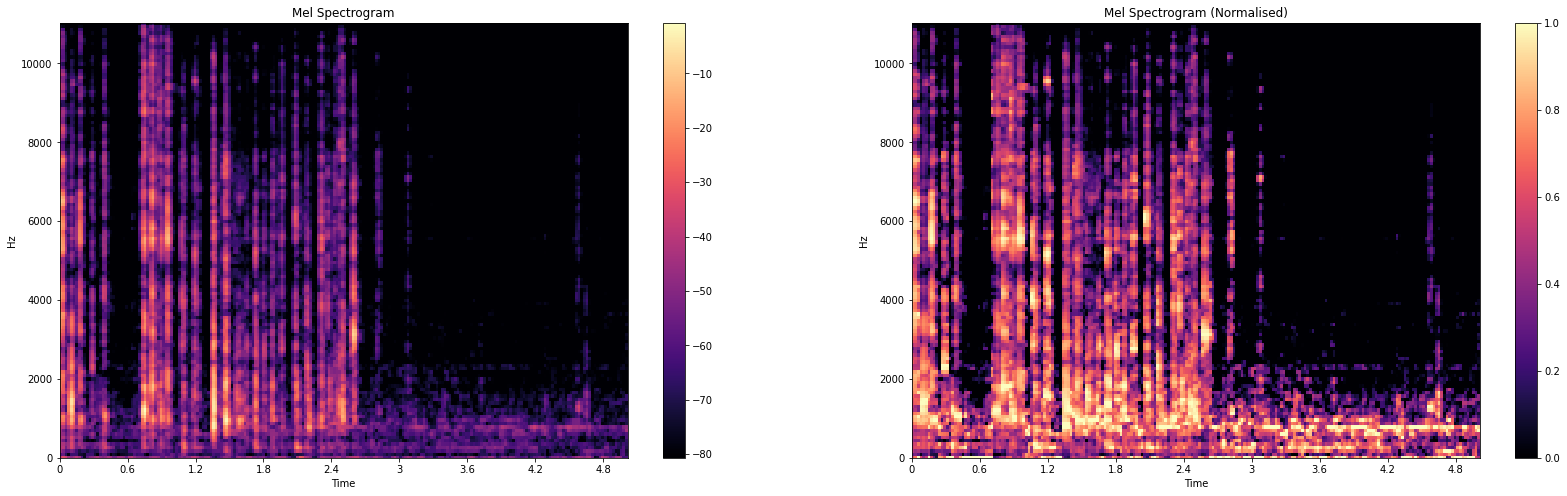

In [81]:
train_mel_spec_normalised = np.load('train_mel_spec_normalised.npy',allow_pickle = True)
train_mel_spec_cat = np.load('train_mel_spec_cat.npy',allow_pickle = True)

plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
plt.title('Mel Spectrogram')
librosa.display.specshow(train_mel_spec_cat[0][0][:,:,-1], sr=22050, x_axis='time', y_axis='hz') 
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Mel Spectrogram (Normalised)')
librosa.display.specshow(train_mel_spec_normalised[0][0][:,:,-1], sr=22050, x_axis='time', y_axis='hz') 
plt.colorbar()

del train_mel_spec_normalised
del train_mel_spec_cat

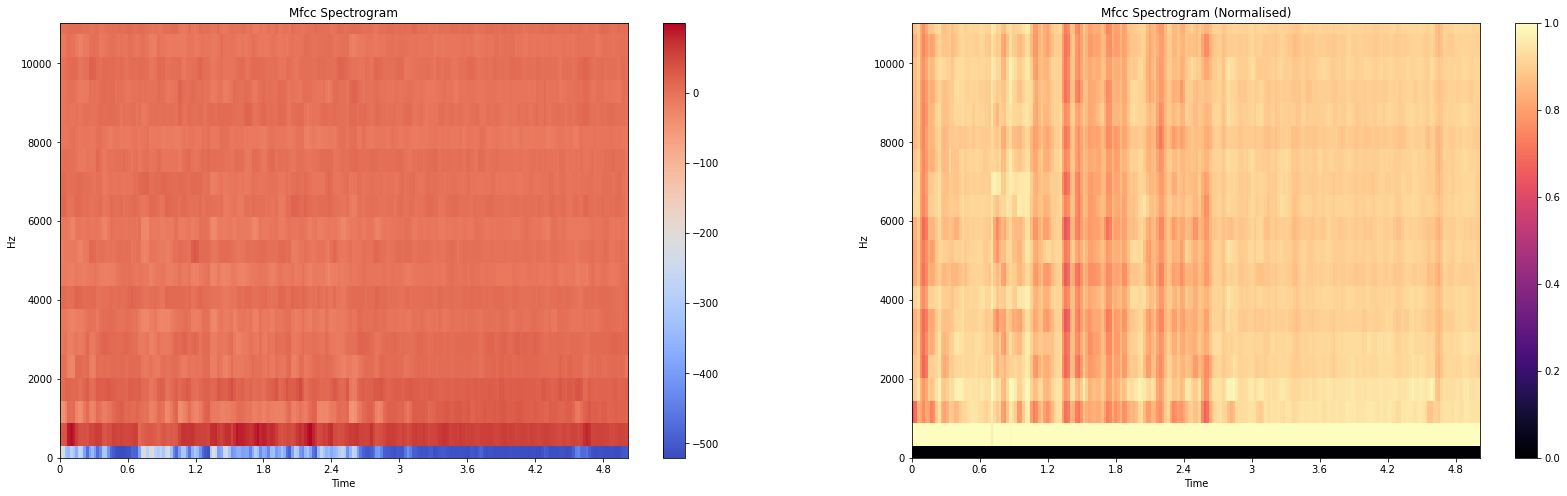

In [82]:
train_mfcc_spec_normalised = np.load('train_mfcc_spec_normalised.npy',allow_pickle= True)
train_mfcc_spec_cat = np.load('train_mfcc_spec_cat.npy',allow_pickle= True)

plt.figure(figsize=(28,8))
plt.subplot(1,2,1)
plt.title('Mfcc Spectrogram')
librosa.display.specshow(train_mfcc_spec_cat[0][0][:,:,-1], sr=22050, x_axis='time', y_axis='hz') 
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Mfcc Spectrogram (Normalised)')
librosa.display.specshow(train_mfcc_spec_normalised[0][0][:,:,-1], sr=22050, x_axis='time', y_axis='hz') 
plt.colorbar()

del train_mfcc_spec_normalised
del train_mfcc_spec_cat

**Feature Dimensionality Reduction using PCA**

In [83]:
get_ipython().magic('reset -sf')
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import librosa
import librosa.display
from tqdm import tqdm
import IPython.display as ipd
from IPython.core.display import display
import re
from sklearn.model_selection import train_test_split
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from IPython import get_ipython; 

#Function to plot a single Audio file
def plotAudio(data,sample_rate):
    ipd.Audio(data,rate = sample_rate)
    librosa.display.waveplot(data)
    plt.show()

#Function to listen a single Audio file
def listenAudio(data,sample_rate):
    display(ipd.Audio(data,rate = sample_rate))
    plt.show()

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [85]:
train_mfcc_spec_normalised = np.load('train_mfcc_spec_normalised.npy',allow_pickle= True)

In [86]:
train_mfcc_spec_normalised_transpose = np.zeros((1,216,20))
for i in range(train_mfcc_spec_normalised.shape[0]):
    train_mfcc_spec_normalised_transpose = np.append(train_mfcc_spec_normalised_transpose,[train_mfcc_spec_normalised[i][0][:,:,0].T],axis= 0)

In [87]:
train_mfcc_spec_normalised_transpose = train_mfcc_spec_normalised_transpose[:,:,:, np.newaxis]

In [88]:
train_mfcc_spec_normalised_transpose = train_mfcc_spec_normalised_transpose[1:,:,:,:]

In [89]:
train_mfcc_spec_normalised_transpose_pca = np.zeros((1,216,2))
for i in range(train_mfcc_spec_normalised_transpose.shape[0]):
  train_mfcc_spec_normalised_transpose_pca = np.append(train_mfcc_spec_normalised_transpose_pca,np.array([pca.fit_transform(train_mfcc_spec_normalised_transpose[i,:,:,0])]),axis=0)

In [90]:
train_mfcc_spec_normalised_transpose_pca = train_mfcc_spec_normalised_transpose_pca[:,:,:, np.newaxis]

In [91]:
train_mfcc_spec_normalised_transpose_pca = train_mfcc_spec_normalised_transpose_pca[1:,:,:,:]

In [92]:
img = train_mfcc_spec_normalised_transpose_pca[1,:,:,0]

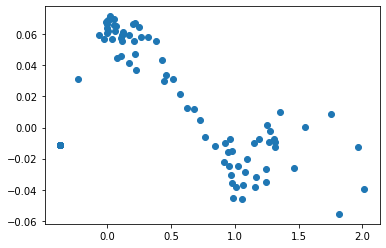

In [93]:
x = img[:,0]
y = img[:,1]
plt.scatter(x,y)
plt.show()

In [94]:
centroids = []
for i in range(train_mfcc_spec_normalised_transpose_pca.shape[0]):
  img = train_mfcc_spec_normalised_transpose_pca[i,:,:,0]
  c_x = np.sum(img[0])/img.shape[0]
  c_y = np.sum(img[1])/img.shape[0]
  centroids.append((c_x,c_y))

In [95]:
x_cents = []
y_cents = []
for i in range(np.array(centroids).shape[0]):
  x_cents.append(centroids[i][0])
  y_cents.append(centroids[i][1])

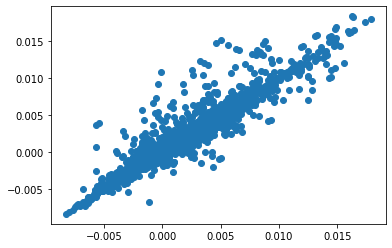

In [96]:
plt.scatter(x_cents,y_cents)
plt.show()

**From the above plot, we can see that the clustering algorithm will not be able to distinguish between 50 classes distinctly.**

<a href="./"> Download File </a>